##### Date vs varible plot using pyplot and matplotlib

In [1]:
import numpy as np
import pandas as pd
from plotly import graph_objects as go
import matplotlib.pyplot as plt

In [2]:
#Load datasets
df = pd.read_csv('https://github.com/bytehub-ai/blog-examples/raw/master/data/jena-temperature-data.csv.gz', parse_dates=[0])
df = df.set_index(df.columns[0])
df.head()

latitude  longitude  surface_temperature_forecast  \
Unnamed: 0                                                               
2017-01-02 00:00:00      51.0       11.5                     -3.000000   
2017-01-02 06:00:00      51.0       11.5                     -1.600006   
2017-01-02 12:00:00      51.0       11.5                      0.500000   
2017-01-02 18:00:00      51.0       11.5                     -3.700012   
2017-01-03 00:00:00      51.0       11.5                     -2.799988   

                     actual  2m_temperature_forecast  
Unnamed: 0                                            
2017-01-02 00:00:00   -2.28                -1.940002  
2017-01-02 06:00:00   -0.51                -1.230011  
2017-01-02 12:00:00    1.37                 0.470001  
2017-01-02 18:00:00   -0.08                -2.739990  
2017-01-03 00:00:00   -0.01                -2.019989

In [3]:
df.tail()

latitude  longitude  surface_temperature_forecast  \
Unnamed: 0                                                               
2019-12-30 18:00:00      51.0       11.5                     -0.031006   
2019-12-31 00:00:00      51.0       11.5                     -0.799988   
2019-12-31 06:00:00      51.0       11.5                      0.299988   
2019-12-31 12:00:00      51.0       11.5                      5.038025   
2019-12-31 18:00:00      51.0       11.5                     -1.120636   

                     actual  2m_temperature_forecast  
Unnamed: 0                                            
2019-12-30 18:00:00    4.72                 2.590149  
2019-12-31 00:00:00    2.40                 1.804932  
2019-12-31 06:00:00    4.84                 1.838745  
2019-12-31 12:00:00    4.65                 4.651794  
2019-12-31 18:00:00    2.85                 0.702210

In [4]:
#just copying the particular year
df_part = df[df.index >= pd.Timestamp('2019-01-01')].drop(columns=['longitude','latitude'])
df_part

surface_temperature_forecast  actual  \
Unnamed: 0                                                  
2019-01-01 00:00:00                      5.048645    7.01   
2019-01-01 00:00:00                      5.048645    7.01   
2019-01-01 06:00:00                      5.503479    7.31   
2019-01-01 06:00:00                      5.503479    7.31   
2019-01-01 12:00:00                      6.267181    6.80   
...                                           ...     ...   
2019-12-30 18:00:00                     -0.031006    4.72   
2019-12-31 00:00:00                     -0.799988    2.40   
2019-12-31 06:00:00                      0.299988    4.84   
2019-12-31 12:00:00                      5.038025    4.65   
2019-12-31 18:00:00                     -1.120636    2.85   

                     2m_temperature_forecast  
Unnamed: 0                                    
2019-01-01 00:00:00                 5.804352  
2019-01-01 00:00:00                 5.804352  
2019-01-01 06:00:00                 6.300201  
2019-01-01 06:00:00                 6.300201  
2019-01-01 12:00:00                 6.984497  
...                                      ...  
2019-12-30 18:00:00                 2.590149  
2019-12-31 00:00:00                 1.804932  
2019-12-31 06:00:00                 1.838745  
2019-12-31 12:00:00                 4.651794  
2019-12-31 18:00:00                 0.702210  

[1461 rows x 3 columns]

In [5]:
#Plot actual datasets
traces = [
    go.Scatter(x=df.index, y=df['actual'], mode = 'lines', name='Actual'),
    go.Scatter(x=df.index, y=df['surface_temperature_forecast'], mode = 'lines',name='Surfcast'),
    go.Scatter(x=df.index, y=df['2m_temperature_forecast'], mode = 'lines',name = '2m forecast'),
]

fig = go.Figure(data=traces, layout={'title': 'temperature',
                                    'yaxis': {'title': 'Temperature, C'},
                                    'margin': {'l':10, 'r':10, 't':25,'b':10},
                                    'template': 'plotly_white'},
               )
fig

In [6]:
#plotting
data = pd.read_csv('https://github.com/bytehub-ai/blog-examples/raw/master/data/jena-temperature-data.csv.gz', parse_dates=[0])
data.head()

Unnamed: 0  latitude  longitude  surface_temperature_forecast  \
0 2017-01-02 00:00:00      51.0       11.5                     -3.000000   
1 2017-01-02 06:00:00      51.0       11.5                     -1.600006   
2 2017-01-02 12:00:00      51.0       11.5                      0.500000   
3 2017-01-02 18:00:00      51.0       11.5                     -3.700012   
4 2017-01-03 00:00:00      51.0       11.5                     -2.799988   

   actual  2m_temperature_forecast  
0   -2.28                -1.940002  
1   -0.51                -1.230011  
2    1.37                 0.470001  
3   -0.08                -2.739990  
4   -0.01                -2.019989

In [7]:
#Let's make sure 'date' is actually a date in pandas
import matplotlib.dates as mdates
data['date'] = pd.to_datetime(data["Unnamed: 0"])

date = data["date"]
actual = data["actual"]
tem2m = data["2m_temperature_forecast"]
surftem = data["surface_temperature_forecast"]


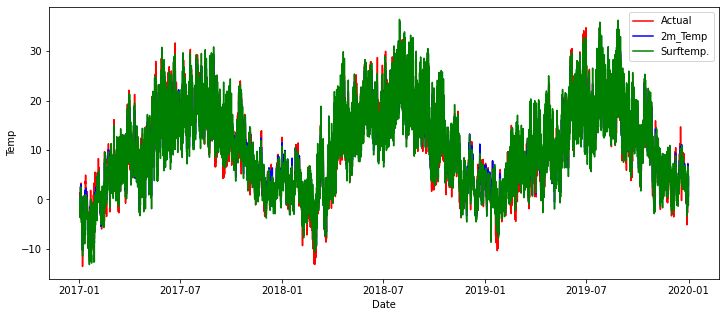

In [8]:
fig, ax = plt.subplots(figsize=(12,5))

half_year_locator = mdates.MonthLocator(interval=6)
year_month_formatter = mdates.DateFormatter("%Y-%m") #four digits for year, two for month

ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_major_formatter(year_month_formatter)
ax.plot(date,actual,color='red',label='Actual')
ax.plot(date,tem2m,color='blue',label='2m_Temp')
ax.plot(date,surftem,color = 'green',label='Surftemp.')
plt.legend(loc='best')
plt.xlabel("Date",fontsize=10)
plt.ylabel("Temp",fontsize=10)
plt.show()